<a href="https://colab.research.google.com/github/nagaraj-bidari/Python/blob/main/property_price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Property price prediction
Property Price Prediction (House Price Estimation)

Problem Statement
Property prices are influenced by multiple factors such as house size, location, age, and overall condition. Accurately estimating property prices is important for buyers, sellers, real estate companies, and financial institutions. Manual estimation often leads to incorrect pricing and poor decision-making.

The objective of this project is to build a regression-based machine learning model to predict property prices using historical housing data and to identify the most important factors influencing house prices.

Objectives of the Project
Understand property price patterns

Perform basic data preprocessing

Conduct minimal but meaningful Exploratory Data Analysis (EDA)

Build regression-based machine learning models

Evaluate model performance using regression metrics

Identify key price-influencing features

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from google.colab import files
uploaded=files.upload()


Saving train.csv to train (1).csv


In [ ]:
df = pd.read_csv("train.csv")
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df.isnull()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [ ]:
# Numerical columns
num_cols = df.select_dtypes(include=['int64','float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())


In [ ]:
# Categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


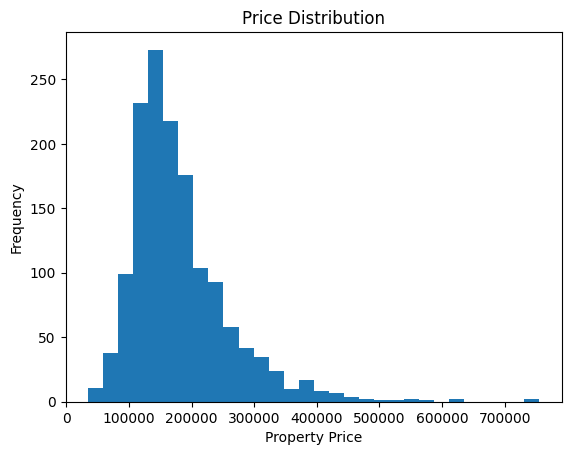

In [ ]:

#Explory Data Analysis
#Graph 1 price prediction
plt.figure()
plt.hist(df['SalePrice'], bins=30)
plt.xlabel("Property Price")
plt.ylabel("Frequency")
plt.title("Price Distribution")
plt.show()

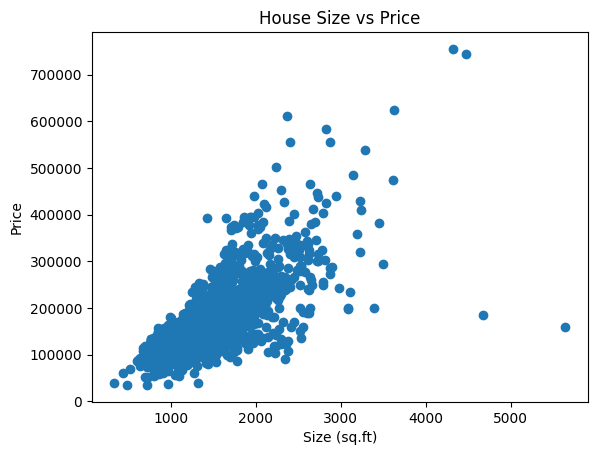

In [ ]:
#Graph 2 House size vs price
plt.figure()
plt.scatter(df['GrLivArea'], df['SalePrice'])
plt.xlabel("Size (sq.ft)")
plt.ylabel("Price")
plt.title("House Size vs Price")
plt.show()


<Figure size 640x480 with 0 Axes>

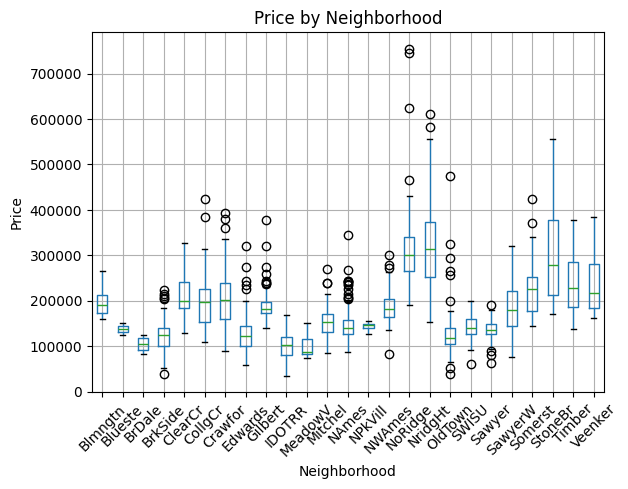

In [ ]:
#Price by location
plt.figure()
df.boxplot(column='SalePrice', by='Neighborhood')
plt.xlabel("Neighborhood")
plt.ylabel("Price")
plt.title("Price by Neighborhood")
plt.suptitle("")
plt.xticks(rotation=45)
plt.show()


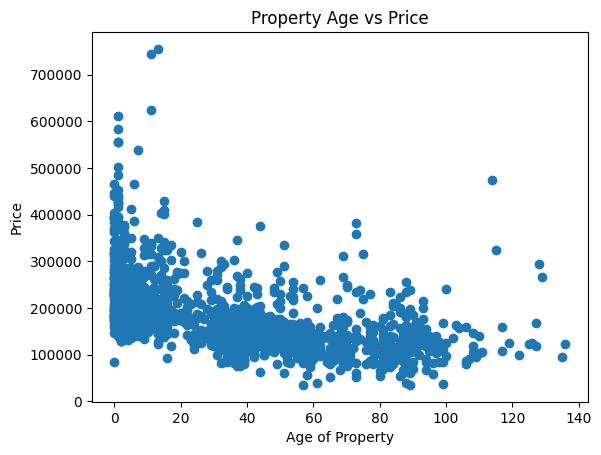

In [ ]:
#Graph 4 Property Age vs price
df['Age'] = df['YrSold'] - df['YearBuilt']
plt.figure()
plt.scatter(df['Age'], df['SalePrice'])
plt.xlabel("Age of Property")
plt.ylabel("Price")
plt.title("Property Age vs Price")
plt.show()


In [ ]:
#Encode Categorical Variables
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
#Feature selection
X = df.drop(['Id','SalePrice'], axis=1)
y = df['SalePrice']


In [ ]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
#Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred_lr = lr.predict(X_test)

In [ ]:
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

In [ ]:
print("Linear Regression RMSE:", rmse_lr)
print("Linear Regression R2 Score:", r2_lr)


Linear Regression RMSE: 35312.138344719235
Linear Regression R2 Score: 0.8374323228511199


In [ ]:
#decision tree regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [ ]:
y_pred_dt = dt.predict(X_test)

In [ ]:
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

In [ ]:
print("Decision Tree RMSE:", rmse_dt)
print("Decision Tree R2 Score:", r2_dt)


Decision Tree RMSE: 43833.769223265444
Decision Tree R2 Score: 0.7495022672545355


In [ ]:
#Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
y_pred_rf = rf.predict(X_test)

In [ ]:
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)


In [ ]:
print("Random Forest RMSE:", rmse_rf)
print("Random Forest R2 Score:", r2_rf)

Random Forest RMSE: 28316.757688529135
Random Forest R2 Score: 0.8954622340260382


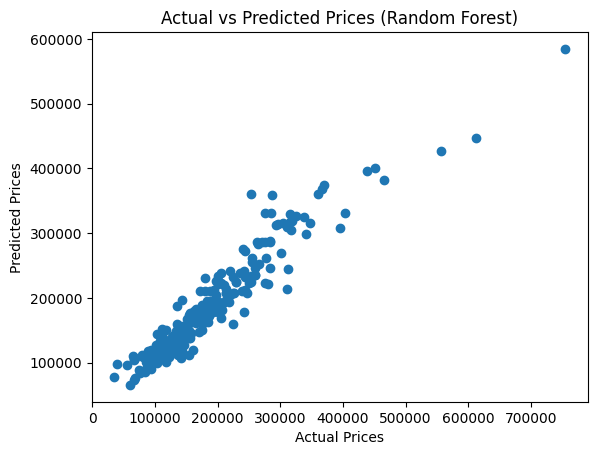

In [ ]:
#Graph 5 Actual vs Predicted
plt.figure()
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (Random Forest)")
plt.show()

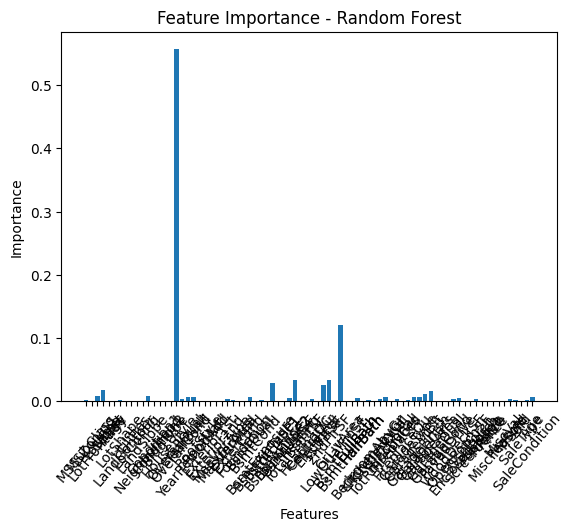

In [ ]:
#Graph 6 Feature Importance
importance = rf.feature_importances_
features = X.columns

plt.figure()
plt.bar(features, importance)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance - Random Forest")
plt.xticks(rotation=50)
plt.show()


In [ ]:
#Final model Comparison
print("MODEL COMPARISON")
print("-----------------------------")
print("Linear Regression -> RMSE:", rmse_lr, " R2:", r2_lr)
print("Decision Tree     -> RMSE:", rmse_dt, " R2:", r2_dt)
print("Random Forest     -> RMSE:", rmse_rf, " R2:",r2_rf)

MODEL COMPARISON
-----------------------------
Linear Regression -> RMSE: 35312.138344719235  R2: 0.8374323228511199
Decision Tree     -> RMSE: 43833.769223265444  R2: 0.7495022672545355
Random Forest     -> RMSE: 28316.757688529135  R2: 0.8954622340260382
